# 타이타닉 데이터 EDA Solution  
데이터를 통해 얻을 수 있는 인사이트를 확인하며 인사이트를 얻기 위한 논리의 근거를 데이터로서 확인해야 하는 과정에 집중하자.

생존에 영향을 미친 요인이 무엇인지 찾고, 높은 영향력을 가진 컬럼 순서대로 순위화 진행.


**columns 정보**
- pclass : 객실 등급
- survived : 생존 유무
- name : 칭호를 포함한 이름
- sex : 성별
- age : 나이
- sibsp : 형제 혹은 부부의 수
- parch : 부모, 혹은 자녀의 수
- ticket : 탑승권 종류 (각 숫자가 의미하는 바는 데이터를 통해 알 수 있는 것이 없을 수 있습니다.)
- fare : 지불한 운임
- cabin : 객실정보
- embarked : 선착장정보, S=Southhampton, C=Cherbourg, Q=Queenstown
- boat : 탈출한 보트가 있다면 boat 번호
- body : 사망자의 시신 수습 후 부여한 일련번호
- home : 출신

### 추측 & 가설 - 어떤 요인이 타이타닉 생존률에 영향을 미쳤을까?


***분석 전 예상***
* sex - 재난 상황에서 신체적으로 생존에 유리한 남성이 여성에 비해 생존률이 높았을 것이다.

* age - 신체능력이 가장 뛰어난 20,30대가 높은 생존률을 가질 것으로 예상한다.

* pclass - 당시 시대 분위기를 고려했을 때, 더 높은 객실 등급에 머물렀던 손님이 생존 과정에서 우선적으로 구출되었을 것이다. 
    - (또한 높은 신분에 위치한 사람은 특정 집이나 지역에 거주할 것이며, 상대적으로 높은 경제적 능력을 가지고 있을 것이다. 그러므로 home, fare 컬럼은  pclass 컬럼들과 직접적인 영향이 있을것으로 예상된다.)

* sibsp, parch 형제, 부부, 부모, 자녀가 있는 사람들은 서로 도울 수 있기 때문에 혼자인 사람들에 비해 생존률이 높을것으로 예상된다.

* body 컬럼은 사망 후 일련 번호이기 때문에 생존요인과 무관할 것이라고 예상된다.


* boat컬럼은 배를 탄 사람, 즉 생존자만 값을 가지고 있기 때문에 생존요인과 무관할 것이라고 예상된다.

* ticket 컬럼은 티켓넘버가 pclass와 관련있다면 생존과 유의미할 수도 있지만, 랜덤숫자라면 생존과 관련없을 것이다.

# 1.데이터 확인

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [135]:
# df = pd.read_csv('titanic.csv')
df = pd.read_csv('/content/drive/MyDrive/부트캠프_프로젝트/타이타닉/titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [ ]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

### 전체 데이터 수 1309개
#### age, fare, cabin, embarked, boat, body, home.dest, 7개 컬럼에 결측치가 확인됩니다.

# 2.컬럼 확인

## 전처리 계획
결측 값이 있을 경우, 제거 및 대체 / 결측값이 없더라도 생존과 무관하다고 판단되면 제커

#### - 일반 컬럼
#### - 결측치 포함 컬럼

### 무결측 컬럼

####1 pclass 컬럼

In [146]:
print(df['pclass'].unique())
print(df['pclass'].value_counts())

[1 2 3]
3    709
1    323
2    277
Name: pclass, dtype: int64


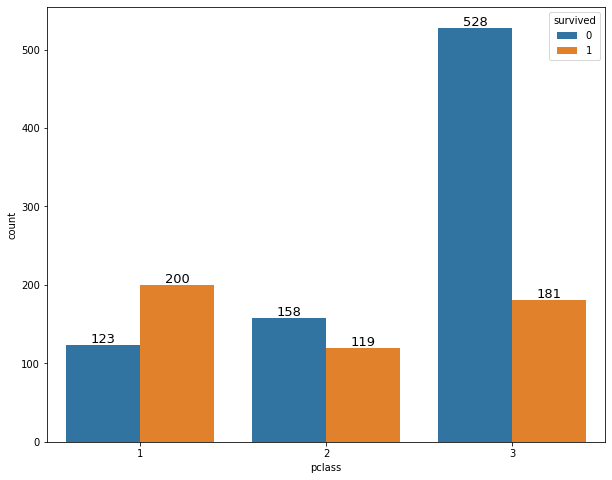

In [155]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x = 'pclass', data = df, hue = 'survived')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 13)

plt.show()

####2 name 컬럼

In [156]:
print(df['name'].unique())
print(df['name'].value_counts())

['Allen, Miss. Elisabeth Walton' 'Allison, Master. Hudson Trevor'
 'Allison, Miss. Helen Loraine' ... 'Zakarian, Mr. Mapriededer'
 'Zakarian, Mr. Ortin' 'Zimmerman, Mr. Leo']
Connolly, Miss. Kate             2
Kelly, Mr. James                 2
Allen, Miss. Elisabeth Walton    1
Ilmakangas, Miss. Ida Livija     1
Ilieff, Mr. Ylio                 1
                                ..
Hart, Miss. Eva Miriam           1
Harris, Mr. Walter               1
Harris, Mr. George               1
Harper, Rev. John                1
Zimmerman, Mr. Leo               1
Name: name, Length: 1307, dtype: int64


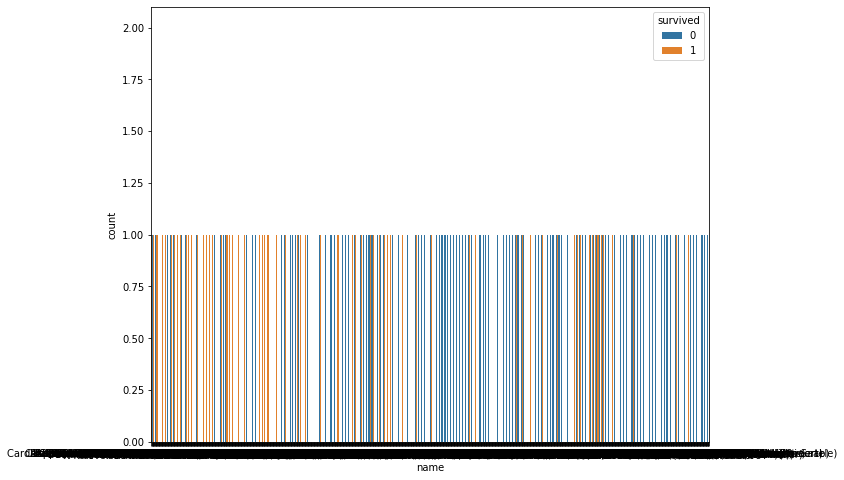

In [158]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x = 'name', data = df, hue = 'survived')

plt.show()

####3 sex 컬럼

In [159]:
print(df['sex'].unique())
print(df['sex'].value_counts())

['female' 'male']
male      843
female    466
Name: sex, dtype: int64


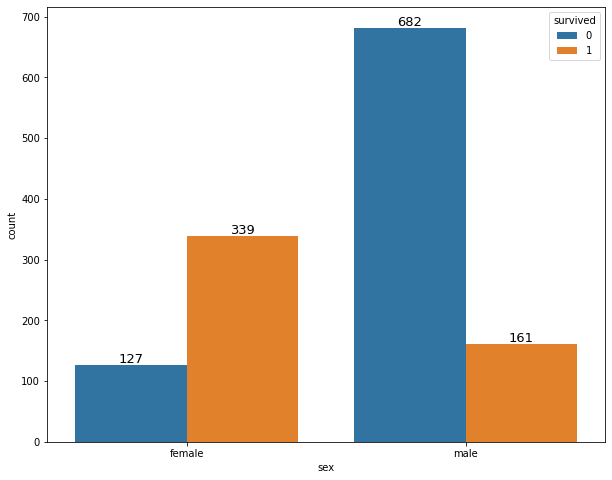

In [160]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x = 'sex', data = df, hue = 'survived')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 13)

plt.show()

####4 sibsp 컬럼

In [161]:
print(df['sibsp'].unique())
print(df['sibsp'].value_counts())

[0 1 2 3 4 5 8]
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: sibsp, dtype: int64


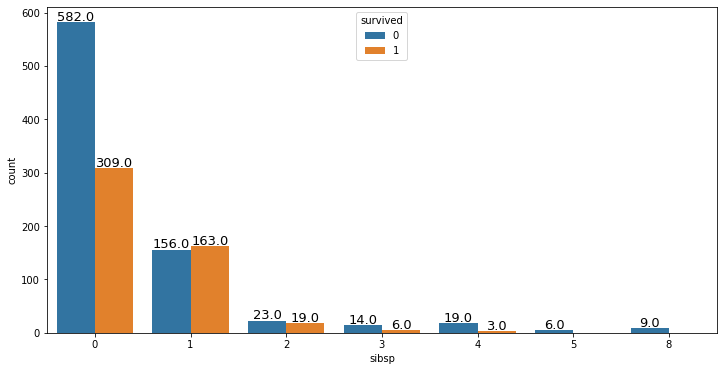

In [163]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x = 'sibsp', data = df, hue = 'survived')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 13)

plt.show()

####5 parch 컬럼

In [164]:
print(df['parch'].unique())
print(df['parch'].value_counts())

[0 2 1 4 3 5 6 9]
0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: parch, dtype: int64


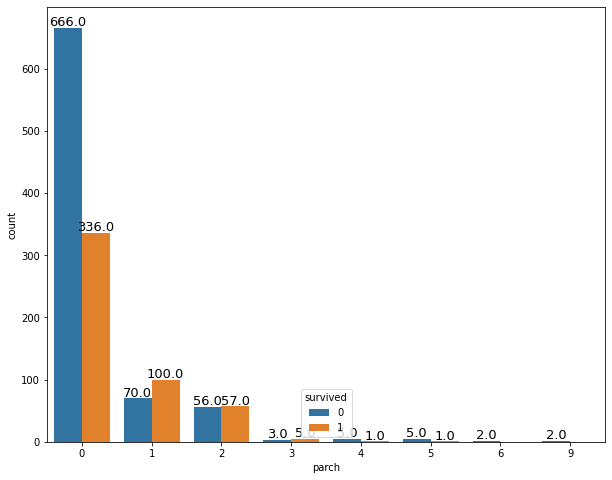

In [165]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x = 'parch', data = df, hue = 'survived')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 13)

plt.show()

sibsp, parch 컬럼의 경우 1~2명의 가족이 있을 때 가장 생존률이 높았다.
반면 가족이 없을 경우 사망률은 크게 증가하는 그래프를 보여준다.<br>

####6 ticket 컬럼

In [166]:
print(df['ticket'].unique())
print(df['ticket'].value_counts())

['24160' '113781' '19952' '13502' '112050' '11769' 'PC 17609' 'PC 17757'
 'PC 17477' '19877' '27042' 'PC 17318' 'PC 17558' '11813' '13050' '11751'
 '111369' 'PC 17483' '13905' '11967' 'PC 17760' '110564' '113784' '112277'
 '36928' '113783' '110489' 'PC 17608' '113505' '111427' '113054'
 'PC 17591' '112379' 'PC 17610' '16966' '113050' '113798' 'PC 17476'
 'PC 17606' 'PC 17755' '695' '113059' '113760' '19924' '17770'
 'W.E.P. 5734' '113806' '110152' 'PC 17594' '112051' '13508' '110465'
 '5727' 'PC 17756' '11770' '113791' 'WE/P 5735' '112901' 'PC 17599'
 '113055' '113804' 'F.C. 12750' '17474' '33638' 'PC 17761' '11755'
 'PC 17485' 'PC 17580' '11767' '36947' 'PC 17531' 'PC 17598' '17421'
 'PC 17474' '113051' '19950' '113778' 'PC 17611' '17765' '13568' '13567'
 '112058' '113803' '111320' '113503' '112378' 'PC 17593' '17453'
 'PC 17754' '113780' '112053' 'PC 17582' 'PC 17759' '11765' 'PC 17572'
 '113796' '36973' '112059' '16988' '12749' '113038' '17463' '680' '111361'
 '113789' '111426' '199

In [ ]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x = 'ticket', data = df, hue = 'survived')

plt.show()

티켓 번호가 랜덤인 경우 생존이랑 관련없으며, 만약 번호에 객실 정보나 티켓 비용에 대한 정보가 담겨있다면 생존과 관련있으며 이는 pclass와 연관될 것이다.

### 결측 컬럼

####1 age 컬럼

In [44]:
print(df['age'].unique())
print(df['age'].value_counts())

[29.    0.92  2.   30.   25.   48.   63.   39.   53.   71.   47.   18.
 24.   26.   80.     nan 50.   32.   36.   37.   42.   19.   35.   28.
 45.   40.   58.   22.   41.   44.   59.   60.   33.   17.   11.   14.
 49.   76.   46.   27.   64.   55.   70.   38.   51.   31.    4.   54.
 23.   43.   52.   16.   32.5  21.   15.   65.   28.5  45.5  56.   13.
 61.   34.    6.   57.   62.   67.    1.   12.   20.    0.83  8.    0.67
  7.    3.   36.5  18.5   5.   66.    9.    0.75 70.5  22.5   0.33  0.17
 40.5  10.   23.5  34.5  20.5  30.5  55.5  38.5  14.5  24.5  60.5  74.
  0.42 11.5  26.5 ]
24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
         ..
0.33      1
22.50     1
70.50     1
0.67      1
26.50     1
Name: age, Length: 98, dtype: int64


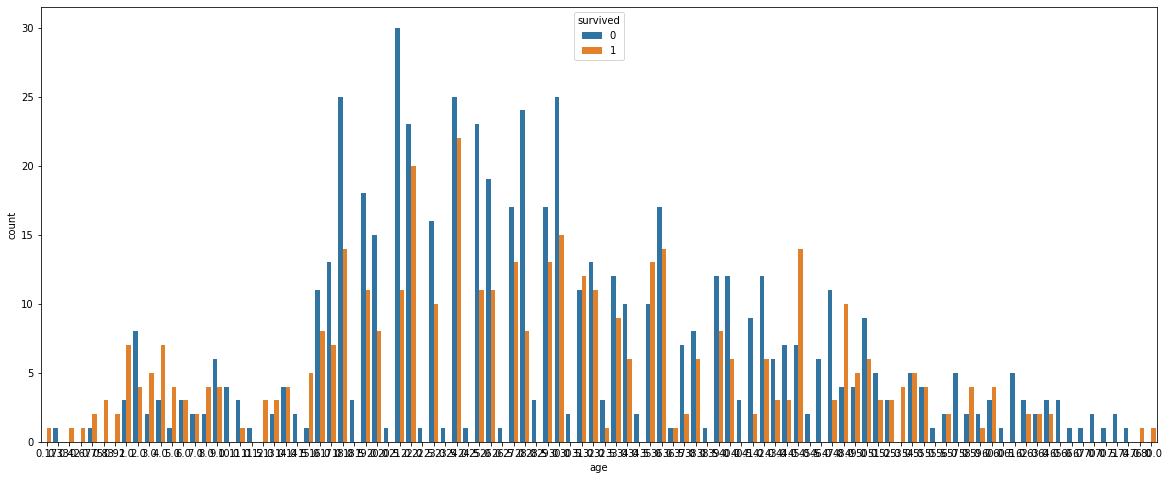

In [46]:
plt.figure(figsize=(20,8))
sns.countplot(data=df, x='age', hue='survived')
plt.show()

In [47]:
#연령대별 생존률
df_age = df

df_age.loc[df_age['age']<=20, 'age']=0
df_age.loc[(df_age['age']<=40)&(df_age['age']>20), 'age']=1
df_age.loc[(df_age['age']<=60)&(df_age['age']>40), 'age']=2
df_age.loc[(df_age['age']<=80)&(df_age['age']>60), 'age']=3
df_age.loc[df_age['age']>80, 'age']=4

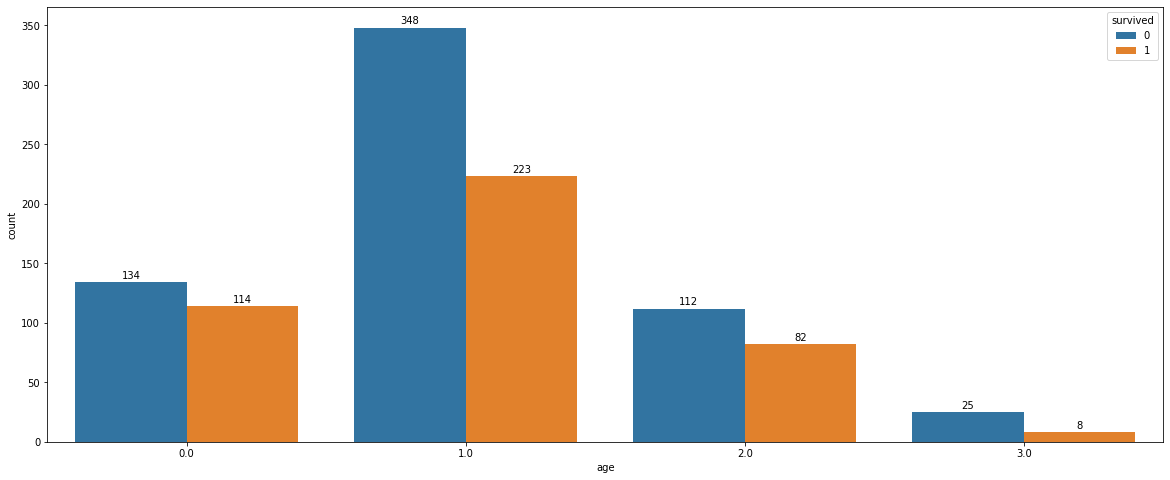

In [143]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x = 'age', data = df_age, hue = 'survived', dodge = True)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 10)

plt.show()

젊은 나이일 수록 생존률이 높을 것으로 예상했지만 연령대별 생존 유무는 차이나지 않는것으로 보인다.
<br>
 **=> 263개의 결측치, 평균 값으로 대체**

####2 fare 컬럼

In [138]:
print(df['fare'].unique())
print(df['fare'].value_counts())

[211.3375 151.55    26.55    77.9583   0.      51.4792  49.5042 227.525
  69.3     78.85    30.      25.925  247.5208  76.2917  75.2417  52.5542
 221.7792  26.      91.0792 135.6333  35.5     31.     164.8667 262.375
  55.      30.5     50.4958  39.6     27.7208 134.5     26.2875  27.4458
 512.3292   5.      47.1    120.      61.175   53.1     86.5     29.7
 136.7792  52.      25.5875  83.1583  25.7     71.      71.2833  57.
  81.8583 106.425   56.9292  78.2667  31.6792  31.6833 110.8833  26.3875
  27.75   263.     133.65    49.5     79.2     38.5    211.5     59.4
  89.1042  34.6542  28.5    153.4625  63.3583  55.4417  76.7292  42.4
  83.475   93.5     42.5     51.8625  50.      57.9792  90.      30.6958
  80.      28.7125  25.9292  39.4     45.5    146.5208  82.1708  57.75
 113.275   26.2833 108.9     25.7417  61.9792  66.6     40.125   55.9
  60.      82.2667  32.3208  79.65    28.5375  33.5     34.0208  75.25
  77.2875  61.3792  35.      24.      13.      11.5     10.5     12.525
 

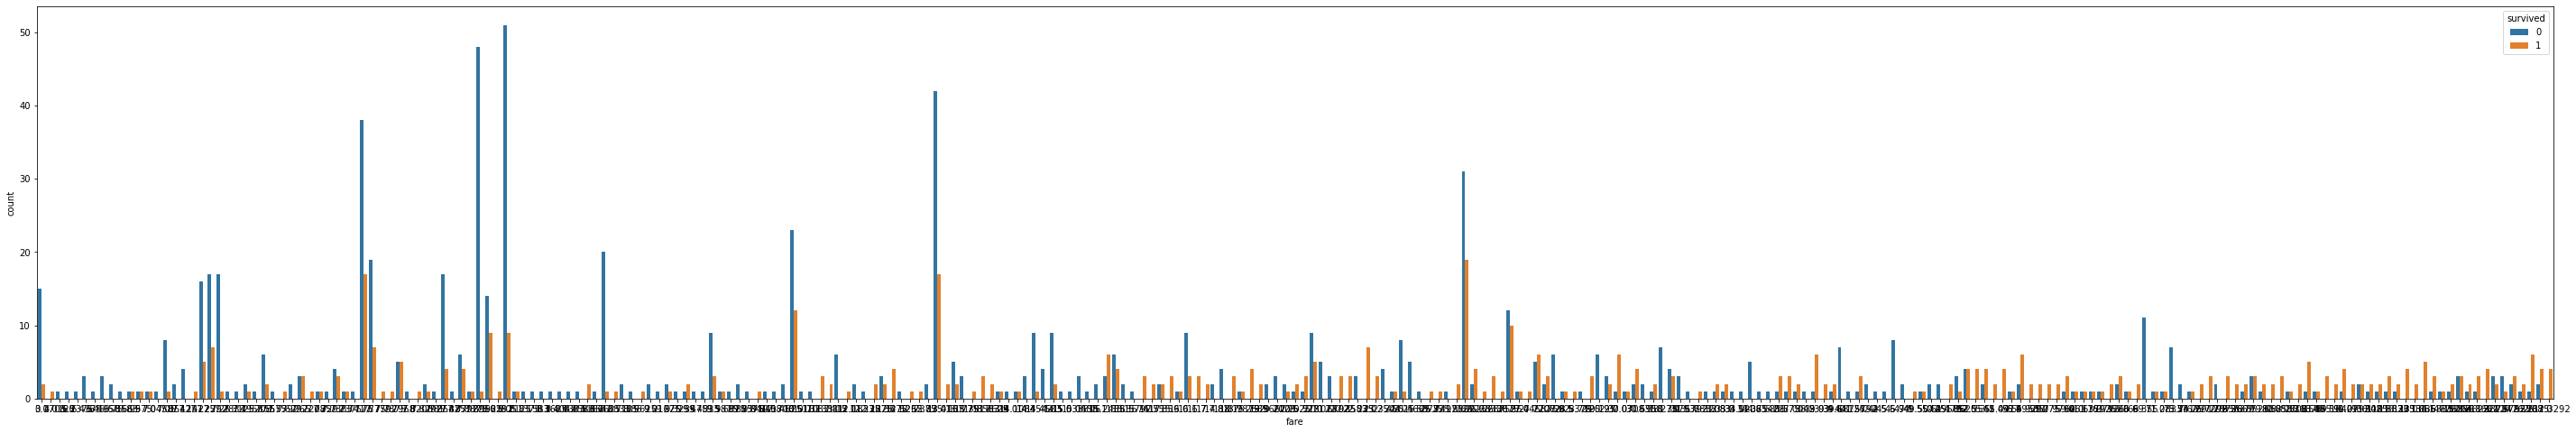

In [139]:
plt.figure(figsize=(50,8))
sns.countplot(data=df, x='fare', hue='survived')
plt.show()

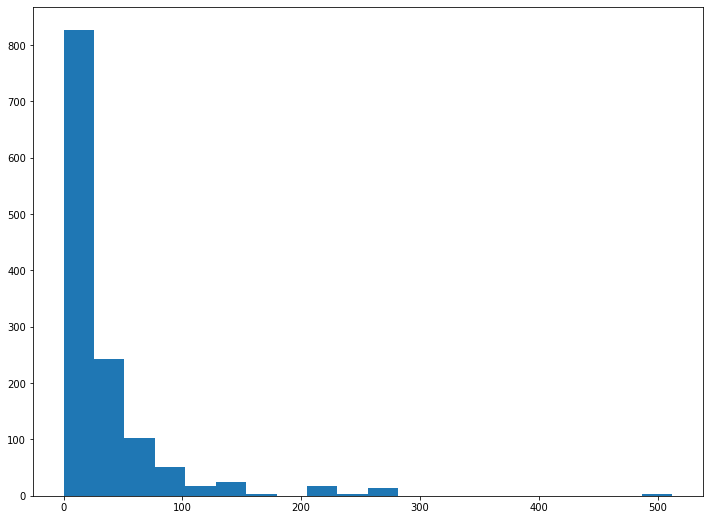

In [ ]:

df['fare'].hist(bins=20,figsize=(12,9),grid=False)

낮은 금액대에 대부분의 데이터가 몰려있어서 유의미한 상관관계를 파악하기 어렵지만, 상대적으로 고가의 티켓을 지불한 사람이 생존률이 더 높다.
pclass와 직접적인 관련이 있는 컬럼으로서 더 좋은 객실에 머무른 사람이 생존과정에서도 더 좋은 환경에 놓여졌을 것이라고 생각한다.

**=> 1개의 결측치, 해당 데이터만 제거**

####3 cabin 컬럼 (보류)

In [ ]:
# DATASET_RAW.replace('정상', '양품', inplace = True)

In [120]:
df_cabin = df

# df_cabin['cabin'].str.replace('A', 'A')
# df_cabin['cabin'].str.replace('A', 'A', inplace= True )
# df_cabin['cabin'].str.replace('B', 'B',inplace= True)
# df_cabin['cabin'].str.replace('C', 'C',inplace= True)
# df_cabin['cabin'].str.replace('D', 'D',inplace= True)
# df_cabin['cabin'].str.replace('F', 'F',inplace= True)
# df_cabin['cabin'].str.replace('E', 'E',inplace= True)
# df_cabin['cabin'].str.replace('G', 'G',inplace= True)
# df_cabin['cabin'].str.replace('T', 'T',inplace= True)


In [ ]:
# dt['주소'].str.contains('종로구')

In [ ]:
# # df_cabin['cabin'] =  df_cabin[df_cabin['cabin'].str.contains('C') == True].replace('C')

# df.head(30)


# # DATASET_RAW['FACTORY_NUM'] = DATASET_RAW['FACTORY_NUM'].str.replace('공장', '라인')
# # DATASET_RAW
# df[df['cabin'].str.contains('C', na = False)]

In [ ]:
# df['cabin'] = df.replace(df['cabin'].str.contains('C'), 'C',inplace=True)

# df.head(10)

In [ ]:
# df_cabin['cabin'] =  df_cabin['cabin'].str.replace('C', 'C1')

# df_cabin.head(30)


# # DATASET_RAW['FACTORY_NUM'] = DATASET_RAW['FACTORY_NUM'].str.replace('공장', '라인')
# # DATASET_RAW

In [ ]:
# print(df_cabin['cabin'].unique())
# print(df_cabin['cabin'].value_counts())

In [ ]:
# plt.figure(figsize=(150,8))
# sns.countplot(data=df, x='cabin', hue='survived',order = df['cabin'].value_counts().index)
# plt.show()

<!-- 생존과 사망에서 특징을 찾기 어려울 것으로 판단된다.

**=> 컬럼 삭제** -->

#### 4 embarked 컬럼

In [140]:
print(df['embarked'].unique())
print(df['embarked'].value_counts())

['S' 'C' nan 'Q']
S    914
C    270
Q    123
Name: embarked, dtype: int64


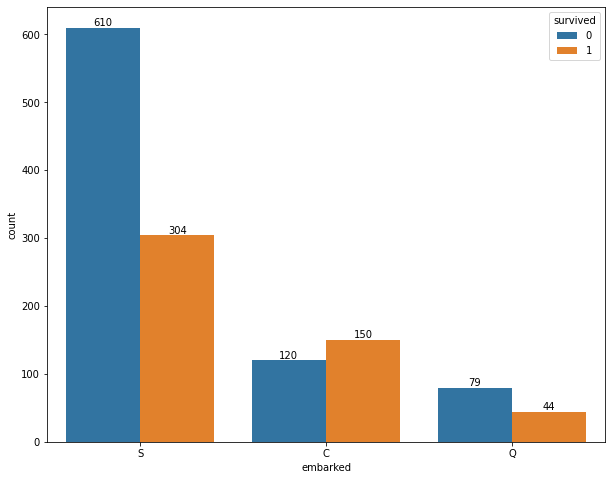

In [170]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='embarked', data=df, hue='survived', dodge = True)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 10)

plt.show()


선착장 위치에 따라 생존률 변화가 관찰됩니다.<br>
C > Q >= S <br>
C선착장이 구명보트에 접근하기 쉬운 위치 or 탈출에 유리한 장소였을 것이라고 예상됩니다.<br>

**=> 2개의 결측치 데이터, 해당 데이터만 삭제**

####5 boat 컬럼

In [26]:
df['boat'].unique()

array(['2', '11', nan, '3', '10', 'D', '4', '9', '6', 'B', '8', 'A', '5',
       '7', 'C', '14', '5 9', '13', '1', '15', '5 7', '8 10', '12', '16',
       '13 15 B', 'C D', '15 16', '13 15'], dtype=object)

In [27]:
df['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

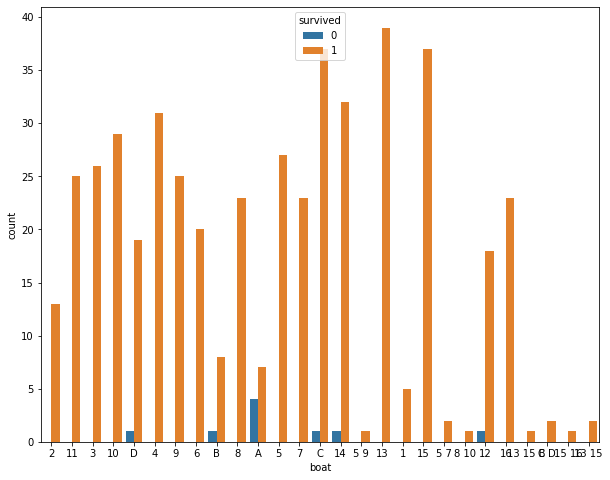

In [28]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='boat', hue='survived')
plt.show()

보트 값을 가진 사람은 대부분이 생존자이다. 
보트를 탔음에도 사망한 사람은  

*   차가운 물에 빠져 동상했거나, 
*   탈출 과정에서의 부상
*   이미 사망한 사람을 태웠을 경우로 예상한다.

**=> 컬럼 삭제**

####6 body 컬럼

In [29]:
print(df['body'].unique())

print(df['body'].value_counts())

[ nan 135.  22. 124. 148. 208. 172. 269.  62. 133. 275. 147. 110. 307.
  38.  80.  45. 258. 126. 292. 175. 249. 230. 122. 263. 234. 189. 166.
 207. 232.  16. 109.  96.  46. 245. 169. 174.  97.  18. 130.  17. 295.
 286. 236. 322. 297. 155. 305.  19.  75.  35. 256. 149. 283. 165. 108.
 121.  52. 209. 271.  43.  15. 101. 287.  81. 294. 293. 190.  72. 103.
  79. 259. 260. 142. 299. 171.   9. 197.  51. 187.  68.  47.  98. 188.
  69. 306. 120. 143. 156. 285.  37.  58.  70. 196. 153.  61.  53. 201.
 309. 181. 173.  89.   4. 206. 327. 119.   7.  32.  67. 284. 261. 176.
  50.   1. 255. 298. 314.  14. 131. 312. 328. 304.]
135.0    1
101.0    1
37.0     1
285.0    1
156.0    1
        ..
97.0     1
174.0    1
169.0    1
245.0    1
304.0    1
Name: body, Length: 121, dtype: int64


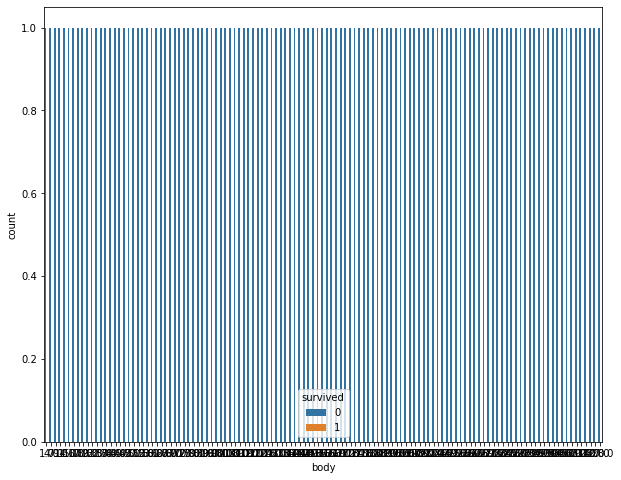

In [30]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='body', hue='survived')
plt.show()

body 값을 가진 사람은 오직 사망자이다.

**=> 컬럼 삭제**

####7 home.dest 컬럼

In [ ]:
print(df['home.dest'].unique())

print(df['home.dest'].value_counts())

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='home.dest', hue='survived')
plt.show()

생존과 사망에서 특징을 찾기 어려울 것으로 판단된다.

**=> 564개의 결측치 데이터, 컬럼 삭제**

# 3.전처리

# 중간 정리

#### 생존과 관련된다고 판단한 컬럼
1. pclass : C > Q >= S 순서대로 생존률의 차이를 보여줌
2. sex : female 성별이 다른 환경 요인과 상관없이 male에 비해서 높은 생존률을 보여준다. 사건 발생 시대와 나라를 고려했을 때 '레이디 퍼스트'라는 서양의 신사도 문화와 상대적으로 신체능력이 약한 여성에게 자리를 배려했을 것이라고 생각된다. 
3. sibsp & parch : 0명 보다 1~2명의 가족이 있는 사람이 생존률이 더 높았다.(서로 돕거나 & 생존 동기 부여가 됐을 거라고 예상)
4. embarked : 특정 선착작에서 탑승한 승객들이 사회적 지위나 경제적으로 부유했을 것으로 예상,  ex)부자동네 선착장


In [ ]:
# df2 = df.drop(['boat','body','home.dest'], axis=1)
# df2

In [ ]:
# print(df['ticket'].unique())

# print(df['ticket'].value_counts())
# #Length: 929 종류의 티켓

In [ ]:
# plt.figure(figsize=(15,8))
# sns.countplot(data=df, x='ticket', hue='survived')
# plt.show()

In [ ]:
# df3 = df[['pclass','survived','sex','age','sibsp','parch','fare','embarked']]
# df3

In [ ]:
# df3['age'] = df3['age'].fillna(df3['age'].mean())


<!-- ###전처리 후 현재 columns 정보
- pclass : 객실 등급
- survived : 생존 유무
- sex : 성별
- age : 나이
- sibsp : 형제 혹은 부부의 수
- parch : 부모, 혹은 자녀의 수
- fare : 지불한 운임
- embarked : 선착장정보 -->